In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

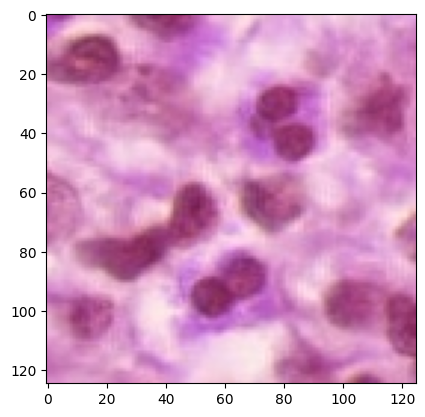

In [24]:
# image = cv2.imread('../patch_position(63852_33420)_256_Eosinophil.jpg')
image = cv2.imread('/home/venkat/Projects/workbook/spear4Med/examples/HL/images/patch_position(63852_33420)_125_Eosinophil.jpg')

# image = cv2.imread('patch_test_256.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_2 = image.copy()
output = image.copy()
plt.imshow(image)
plt.show()
# print(image)

In [25]:
def contour_threshold(img, thresh = 0, isMask = False):
    if not isMask:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #get threshold image
    ret,thresh_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [26]:
def generate_bbox(img, contours, min_area):
    count = 0
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        # draw the bounding rectangle
        if(w*h>min_area):
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cropped_image = img[y:y+h, x:x+w]
            cv2.imwrite(f'./patch_eosinophil/patch_eosinophil{count}.jpg', cropped_image)
            count +=1
        print(w*h)
    # plt.imshow(img)
    # plt.show()

Extracting First Color

[[  0   0   0 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


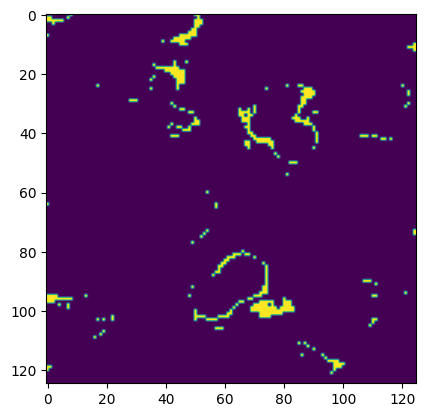

In [27]:
# upper_purple = np.array([237, 178, 229])
# lower_purple = np.array([210, 130, 196])
lower_purple = np.array([150, 70, 165])
upper_purple = np.array([230, 110, 195])

mask = cv2.inRange(image, lower_purple, upper_purple)
print(mask)
plt.imshow(mask)
plt.show()

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[176  79 172]
  [168  73 165]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[179  82 185]
  [176  81 181]
  [169  78 174]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


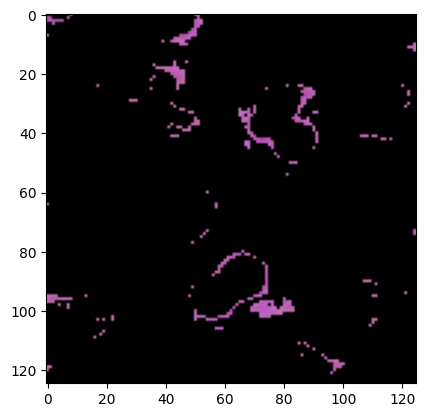

In [28]:
result_1 = cv2.bitwise_and(image, image, mask=mask)
print(result_1)
plt.imshow(result_1)
plt.show()

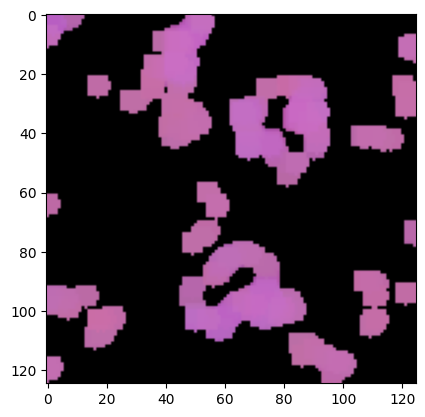

In [29]:
test_eosi = result_1.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
dilated = cv2.dilate(test_eosi, kernel)
plt.imshow(dilated.copy())
plt.show()

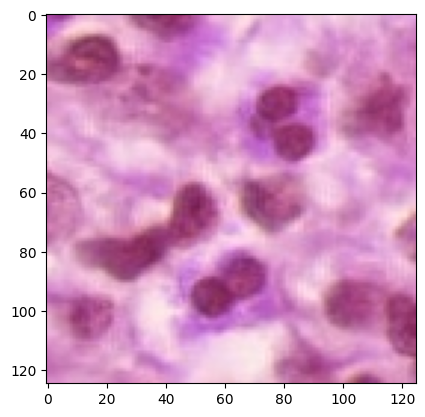

In [30]:
contours = contour_threshold(dilated.copy(), 20)
# cv2.drawContours(image_2, contours, -1, (0,255,0), 2)
plt.imshow(image_2)
plt.show()

54
391
594
56
276
1462
300
36
40
400
162
120
1292
336
64
60
1472
12
156


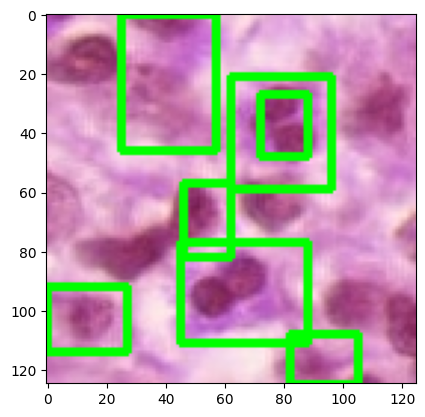

In [31]:
count = 0
draw_image = image_2.copy()
for c in contours:
    # if(cv2.contourArea(c)>100):
    x,y,w,h = cv2.boundingRect(c)
    print(w*h)
    if(w*h>300):
        draw_image = cv2.rectangle(draw_image,(x,y),(x+w,y+h),(0,255,0),2)
        cropped_image = image_2[y:y+h, x:x+w]
        cv2.imwrite(f'./patch_eosi2/patch_thresh_eosi{count}.jpg', cropped_image)
        count +=1

plt.imshow(draw_image)
plt.show()

Eosinophil with Nucleolus

[ WARN:0@977.466] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./patch_eosi2/patch_thresh_eosi2.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

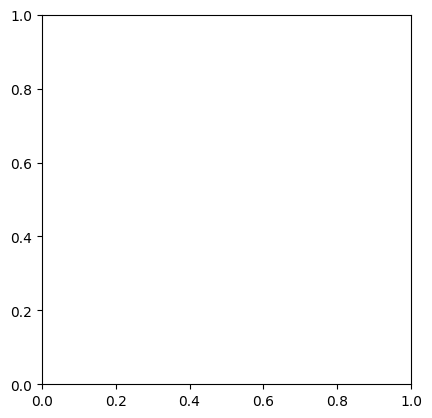

In [32]:
eosinophil = cv2.imread('./patch_eosi2/patch_thresh_eosi2.jpg')
# eosinophil = cv2.imread('./patch_eosi2/patch_thresh_eosi4.jpg')

plt.imshow(eosinophil)
plt.show()

1462
16
49
12
252
126


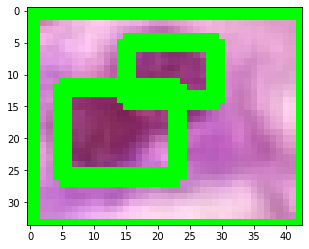

In [138]:
contours = contour_threshold(eosinophil, 90)
count = 0
for c in contours:
    # if(cv2.contourArea(c)>100):
    x,y,w,h = cv2.boundingRect(c)
    print(w*h)
    if(w*h>100):
        eosinophil = cv2.rectangle(eosinophil,(x,y),(x+w,y+h),(0,255,0),2)
    #     cropped_image = image_2[y:y+h, x:x+w]
    #     # cv2.imwrite(f'./patch_eosi2/patch_thresh_eosi{count}.jpg', cropped_image)
    #     count +=1
# cv2.drawContours(eosinophil, contours, -1, (0,255,0), 2)
plt.imshow(eosinophil)
plt.show()

Eosinophil Without Nucleolus

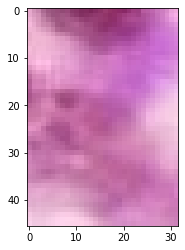

In [139]:
eosinophil = cv2.imread('./patch_eosi2/patch_thresh_eosi6.jpg')
plt.imshow(eosinophil)
plt.show()

In [19]:
contours = contour_threshold(eosinophil, 90)
count = 0
for c in contours:
    # if(cv2.contourArea(c)>100):
    x,y,w,h = cv2.boundingRect(c)
    print(w*h)
    if(w*h>100):
        eosinophil = cv2.rectangle(eosinophil,(x,y),(x+w,y+h),(0,255,0),2)
    #     cropped_image = image_2[y:y+h, x:x+w]
    #     # cv2.imwrite(f'./patch_eosi2/patch_thresh_eosi{count}.jpg', cropped_image)
    #     count +=1
# cv2.drawContours(eosinophil, contours, -1, (0,255,0), 2)
plt.imshow(eosinophil)
plt.show()

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
